# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print('Overall Trends')
print("------------")
print("In the Southern Hemisphere, as latitude increases, temperature increases.")
print("In the Northern Hemisphere, as latitude increases, temperature decreases.")
print("Wind speed is generally low everywhere, aside from some locations which appear random in terms of latitude.")

Overall Trends
------------
In the Southern Hemisphere, as latitude increases, temperature increases.
In the Northern Hemisphere, as latitude increases, temperature decreases.
Wind speed is generally low everywhere, aside from some locations which appear random in terms of latitude.


## Generate Cities List

In [3]:
# List for holding lat_longs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#base url
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'

query_url=f'{url}appid={weather_api_key}&units={units}&q='

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#lists for weather characteristics
name=[]         
cloudiness=[]        
country=[]         
date=[]         
humidity=[]         
lat=[]          
lng=[]          
maxtemp=[]     
wind=[] 

#loop through cities 
#start counter at 1
count=1
print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                                
            name.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            
            print(city + ' city not found. Skipping...') 
                                                                
        count=count+1


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 629 | anadyr
Processing Record 2 of 629 | ushuaia
Processing Record 3 of 629 | lebu
Processing Record 4 of 629 | fortuna
Processing Record 5 of 629 | saint-philippe
Processing Record 6 of 629 | bluff
Processing Record 7 of 629 | senno
Processing Record 8 of 629 | albany
Processing Record 9 of 629 | qaanaaq
Processing Record 10 of 629 | kodiak
Processing Record 11 of 629 | megion
Processing Record 12 of 629 | sohag
Processing Record 13 of 629 | hilo
Processing Record 14 of 629 | belushya guba
belushya guba city not found. Skipping...
Processing Record 15 of 629 | rikitea
Processing Record 16 of 629 | huarmey
Processing Record 17 of 629 | butaritari
Processing Record 18 of 629 | huejuquilla el alto
Processing Record 19 of 629 | nikolskoye
Processing Record 20 of 629 | ponta do sol
Processing Record 21 of 629 | chicama
Processing Record 22 of 629 | pevek
Processing Record 23 of 629 | kashi
Processing Record 24 o

Processing Record 190 of 629 | ruteng
Processing Record 191 of 629 | inta
Processing Record 192 of 629 | chokurdakh
Processing Record 193 of 629 | bilibino
Processing Record 194 of 629 | manyana
Processing Record 195 of 629 | biltine
Processing Record 196 of 629 | vincennes
Processing Record 197 of 629 | pacific grove
Processing Record 198 of 629 | rocha
Processing Record 199 of 629 | atlantic city
Processing Record 200 of 629 | camapua
Processing Record 201 of 629 | inongo
Processing Record 202 of 629 | pochutla
Processing Record 203 of 629 | chapais
Processing Record 204 of 629 | luanda
Processing Record 205 of 629 | walvis bay
Processing Record 206 of 629 | bathsheba
Processing Record 207 of 629 | ternate
Processing Record 208 of 629 | haines junction
Processing Record 209 of 629 | port blair
Processing Record 210 of 629 | bojnurd
Processing Record 211 of 629 | marcona
marcona city not found. Skipping...
Processing Record 212 of 629 | velizh
Processing Record 213 of 629 | awbari
Pro

Processing Record 380 of 629 | gubkinskiy
Processing Record 381 of 629 | shar
Processing Record 382 of 629 | road town
Processing Record 383 of 629 | savannah bight
Processing Record 384 of 629 | petropavlovsk-kamchatskiy
Processing Record 385 of 629 | korcula
Processing Record 386 of 629 | male
Processing Record 387 of 629 | farafangana
Processing Record 388 of 629 | muros
Processing Record 389 of 629 | alice springs
Processing Record 390 of 629 | cienfuegos
Processing Record 391 of 629 | varlamovo
Processing Record 392 of 629 | morgan city
Processing Record 393 of 629 | ushtobe
Processing Record 394 of 629 | oranjemund
Processing Record 395 of 629 | katobu
Processing Record 396 of 629 | provideniya
Processing Record 397 of 629 | dudinka
Processing Record 398 of 629 | manzil salim
Processing Record 399 of 629 | cantanhede
Processing Record 400 of 629 | sao borja
Processing Record 401 of 629 | alekseyevka
Processing Record 402 of 629 | ayan
Processing Record 403 of 629 | ferrol
Process

Processing Record 569 of 629 | zhanatas
zhanatas city not found. Skipping...
Processing Record 570 of 629 | talcahuano
Processing Record 571 of 629 | keti bandar
Processing Record 572 of 629 | bayangol
Processing Record 573 of 629 | acarau
Processing Record 574 of 629 | mathathane
Processing Record 575 of 629 | pitsunda
Processing Record 576 of 629 | luangwa
Processing Record 577 of 629 | lagos
Processing Record 578 of 629 | laval
Processing Record 579 of 629 | sao miguel do araguaia
Processing Record 580 of 629 | pitimbu
Processing Record 581 of 629 | brenham
Processing Record 582 of 629 | lata
Processing Record 583 of 629 | grahamstown
Processing Record 584 of 629 | bambanglipuro
Processing Record 585 of 629 | hearst
Processing Record 586 of 629 | surt
Processing Record 587 of 629 | druzhnaya gorka
Processing Record 588 of 629 | camacha
Processing Record 589 of 629 | hope
Processing Record 590 of 629 | svetlaya
Processing Record 591 of 629 | de-kastri
Processing Record 592 of 629 | l

In [57]:
#make dictionary for dataframe
weatherpydict = {
    'City': name,
    'Country': country,
    'Date': date,
    'Lat': lat,
    'Lng': lng,
    'Cloudiness (%)': cloudiness,
    'Humidity (%)': humidity,
    'Max Temp (F)': maxtemp,
    'Wind Speed (mph)': wind
}

#create dataframe 
weatherpydf=pd.DataFrame(weatherpydict)

#save as csv
weatherpydf.to_csv(os.path.join("..\output_data", "weatherpy.csv"))

weatherpydf


,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Anadyr,RU,1659553484,64.7500,177.4833,0,67,57.00,4.00
1,Ushuaia,AR,1659553552,-54.8000,-68.3000,75,87,42.42,1.14
2,Lebu,CL,1659553742,-37.6167,-73.6500,50,74,51.87,4.63
3,Fortuna,US,1659553743,40.5982,-124.1573,20,81,70.93,10.36
4,Saint-Philippe,RE,1659553743,-21.3585,55.7679,48,83,69.39,8.41
...,...,...,...,...,...,...,...,...,...
575,Novy Urengoy,RU,1659553928,66.0833,76.6333,99,58,61.65,3.89
576,João Pinheiro,BR,1659553929,-17.7425,-46.1725,3,24,85.53,4.52
577,Dunda,TZ,1659553929,-8.1167,34.2500,7,50,62.78,3.74
578,Bilma,NE,1659553929,18.6853,12.9164,21,31,94.96,9.08


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#inspect to see if there are cities with a humidity above 100
print(weatherpydf["Humidity (%)"].max())

print("The maximum humidity in the dataset is 100%, so there are no cities to remove.")

100
The maximum humidity in the dataset is 100%, so there are no cities to remove.


In [8]:
#  Get the indices of cities that have humidity over 100%.
print("The maximum humidity in the dataset is 100%, so there are indicies to retrieve.")

The maximum humidity in the dataset is 100%, so there are indicies to retrieve.


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

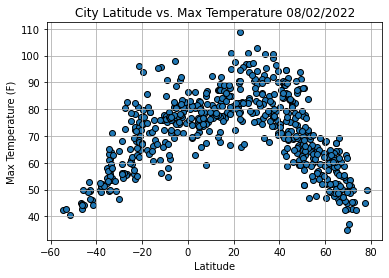

This plot shows city latitude vs. the maximum temperature of each city. There is a relationship between latitude and maximum temperature in both the northern and southern hemispheres.


<Figure size 432x288 with 0 Axes>

In [29]:
temp1 = weatherpydf["Max Temp (F)"]
lat1 = weatherpydf["Lat"]

#scatter plot
plt.scatter(lat1, temp1, marker='o', edgecolor = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature 08/02/2022")
plt.show()

plt.savefig('../output_data/City Latitude vs. MaxTemp.png')

print("This plot shows city latitude vs. the maximum temperature of each city. There is a relationship between latitude and maximum temperature in both the northern and southern hemispheres.")

## Latitude vs. Humidity Plot

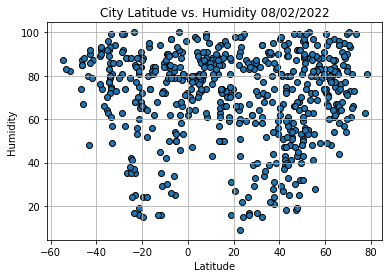

This plot shows city latitude vs. the humidity of each city. There is no relationship between latitude and humidity in either hemisphere.


<Figure size 432x288 with 0 Axes>

In [28]:
humidity1 = weatherpydf["Humidity (%)"]

plt.scatter(lat1, humidity1, marker='o', edgecolor = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity 08/02/2022")
plt.show()

plt.savefig('../output_data/City Latitude vs. Humidity.png')

print("This plot shows city latitude vs. the humidity of each city. There is no relationship between latitude and humidity in either hemisphere.")

## Latitude vs. Cloudiness Plot

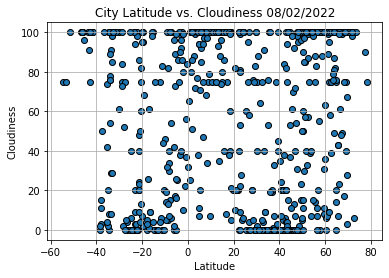

This plot shows city latitude vs. the cloudiness of each city. There is no relationship between latitude and cloudiness in either hemisphere.


<Figure size 432x288 with 0 Axes>

In [31]:
cloudy1 = weatherpydf["Cloudiness (%)"]

plt.scatter(lat1, cloudy1, marker='o', edgecolor = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness 08/02/2022")
plt.show()

plt.savefig('../output_data/City Latitude vs. Cloudiness.png')

print("This plot shows city latitude vs. the cloudiness of each city. There is no relationship between latitude and cloudiness in either hemisphere.")

## Latitude vs. Wind Speed Plot

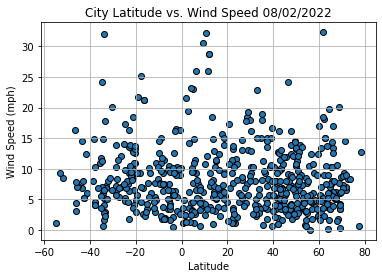

This plot shows city latitude vs. the wind speed of each city. There is no relationship between latitude and wind speed in either hemisphere.


<Figure size 432x288 with 0 Axes>

In [32]:
wind1 = weatherpydf["Wind Speed (mph)"]

plt.scatter(lat1, wind1, marker='o', edgecolor = 'black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed 08/02/2022")
plt.show()

plt.savefig('../output_data/City Latitude vs. Wind Speed.png')

print("This plot shows city latitude vs. the wind speed of each city. There is no relationship between latitude and wind speed in either hemisphere.")

## Linear Regression

In [15]:
#create northern hemisphere dataframe
weatherpynorth = weatherpydf[weatherpydf['Lat']>= 0]


#make southern hemisphere dataframe
weatherpysouth = weatherpydf[weatherpydf['Lat']< 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

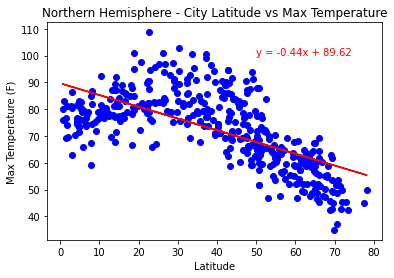

This plot shows city latitude vs the maximum temperature of each city analyzed in the northern hemisphere. There is a negative correlation between latitude and maximum temperature.


<Figure size 432x288 with 0 Axes>

In [33]:
temp2 = weatherpynorth["Max Temp (F)"]
lat2 = weatherpynorth["Lat"]


#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat2, temp2)
regress_values = lat2 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat2, temp2, marker='o', color='blue')
plt.plot(lat2,regress_values,'red')

plt.title('Northern Hemisphere - City Latitude vs Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(50,100), color='red', fontsize=10)
plt.show()

plt.savefig('../output_data/Northern Hemisphere - City Latitude vs. MaxTemp.png')

print("This plot shows city latitude vs the maximum temperature of each city analyzed in the northern hemisphere. There is a negative correlation between latitude and maximum temperature.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

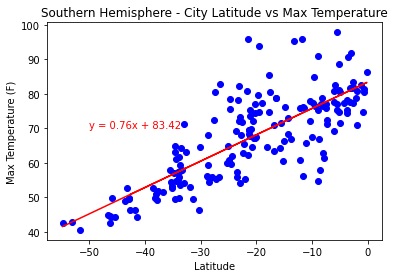

This plot shows city latitude vs the maximum temperature of each city analyzed in the southern hemisphere. There is a positive correlation between latitude and maximum temperature.


<Figure size 432x288 with 0 Axes>

In [34]:
temp3 = weatherpysouth["Max Temp (F)"]
lat3 = weatherpysouth["Lat"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(lat3, temp3)
regress_values = lat3 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat3, temp3, marker='o', color='blue')
plt.plot(lat3,regress_values,'red')

plt.title('Southern Hemisphere - City Latitude vs Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-50,70), color='red', fontsize=10)
plt.show()

plt.savefig('../output_data/Southern Hemisphere - City Latitude vs. MaxTemp.png')
print("This plot shows city latitude vs the maximum temperature of each city analyzed in the southern hemisphere. There is a positive correlation between latitude and maximum temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

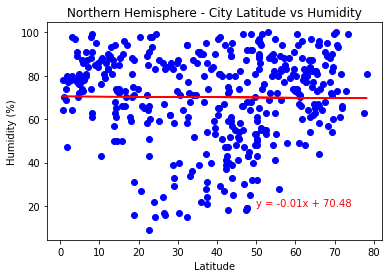

This plot shows city latitude vs the humidity of each city analyzed in the northern hemisphere. There is little to no correlation between latitude and humidity.


<Figure size 432x288 with 0 Axes>

In [35]:
hum2 = weatherpynorth["Humidity (%)"]
lat2 = weatherpynorth["Lat"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(lat2, hum2)
regress_values = lat2 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat2, hum2, marker='o', color='blue')
plt.plot(lat2,regress_values,'red')

plt.title('Northern Hemisphere - City Latitude vs Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(50,20), color='red', fontsize=10)
plt.show()

plt.savefig('../output_data/Northern Hemisphere - City Latitude vs. Humidity.png')
print("This plot shows city latitude vs the humidity of each city analyzed in the northern hemisphere. There is little to no correlation between latitude and humidity.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

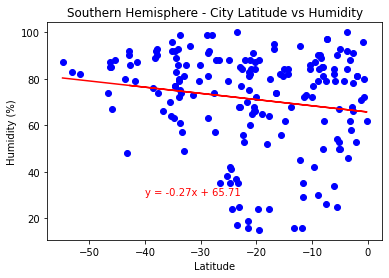

This plot shows city latitude vs the humidity of each city analyzed in the southern hemisphere. There is little to no correlation between latitude and humidity.


<Figure size 432x288 with 0 Axes>

In [36]:
hum3 = weatherpysouth["Humidity (%)"]
lat3 = weatherpysouth["Lat"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(lat3, hum3)
regress_values = lat3 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat3, hum3, marker='o', color='blue')
plt.plot(lat3,regress_values,'red')

plt.title('Southern Hemisphere - City Latitude vs Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-40,30), color='red', fontsize=10)
plt.show()

plt.savefig('../output_data/Southern Hemisphere - City Latitude vs. Humidity.png')

print("This plot shows city latitude vs the humidity of each city analyzed in the southern hemisphere. There is little to no correlation between latitude and humidity.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

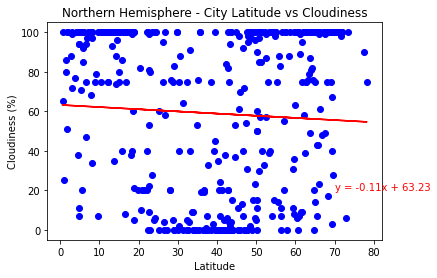

This plot shows city latitude vs the cloudiness of each city analyzed in the northern hemisphere. There is little to no correlation between latitude and cloudiness.


<Figure size 432x288 with 0 Axes>

In [37]:
cloud2 = weatherpynorth["Cloudiness (%)"]
lat2 = weatherpynorth["Lat"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(lat2, cloud2)
regress_values = lat2 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat2, cloud2, marker='o', color='blue')
plt.plot(lat2,regress_values,'red')

plt.title('Northern Hemisphere - City Latitude vs Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(70,20), color='red', fontsize=10)
plt.show()
# print(f'The r-value is: {round(rvalue**2,2)}')

plt.savefig('../output_data/Northern Hemisphere - City Latitude vs. Cloudiness.png')

print("This plot shows city latitude vs the cloudiness of each city analyzed in the northern hemisphere. There is little to no correlation between latitude and cloudiness.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

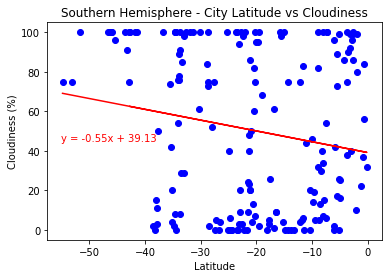

This plot shows city latitude vs the cloudiness of each city analyzed in the southern hemisphere. There is little to no correlation between latitude and cloudiness.


<Figure size 432x288 with 0 Axes>

In [39]:
cloud3 = weatherpysouth["Cloudiness (%)"]
lat3 = weatherpysouth["Lat"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(lat3, cloud3)
regress_values = lat3 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat3, cloud3, marker='o', color='blue')
plt.plot(lat3,regress_values,'red')

plt.title('Southern Hemisphere - City Latitude vs Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-55,45), color='red', fontsize=10)
plt.show()

plt.savefig('../output_data/Southern Hemisphere - City Latitude vs. Cloudiness.png')

print("This plot shows city latitude vs the cloudiness of each city analyzed in the southern hemisphere. There is little to no correlation between latitude and cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

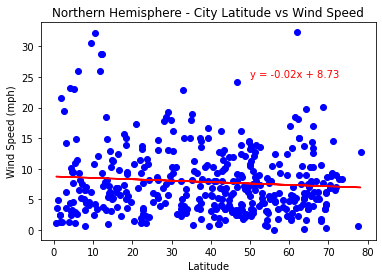

This plot shows city latitude vs the wind speed of each city analyzed in the northern hemisphere. There is little to no correlation between latitude and wind speed.


<Figure size 432x288 with 0 Axes>

In [40]:
wind2 = weatherpynorth["Wind Speed (mph)"]
lat2 = weatherpynorth["Lat"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(lat2, wind2)
regress_values = lat2 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat2, wind2, marker='o', color='blue')
plt.plot(lat2,regress_values,'red')

plt.title('Northern Hemisphere - City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(50,25), color='red', fontsize=10)
plt.show()

# print(f'The r-value is: {round(rvalue**2,2)}')

plt.savefig('../output_data/Northern Hemisphere - City Latitude vs. Wind Speed.png')

print("This plot shows city latitude vs the wind speed of each city analyzed in the northern hemisphere. There is little to no correlation between latitude and wind speed.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

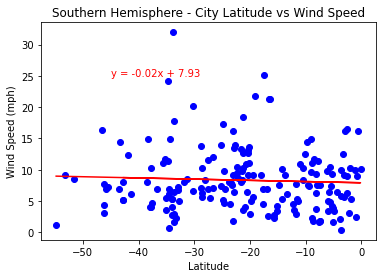

This plot shows city latitude vs the wind speed of each city analyzed in the southern hemisphere. There is little to no correlation between latitude and wind speed.


<Figure size 432x288 with 0 Axes>

In [41]:
wind3 = weatherpysouth["Wind Speed (mph)"]
lat3 = weatherpysouth["Lat"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(lat3, wind3)
regress_values = lat3 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat3, wind3, marker='o', color='blue')
plt.plot(lat3,regress_values,'red')

plt.title('Southern Hemisphere - City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-45,25), color='red', fontsize=10)
plt.show()

plt.savefig('../output_data/Southern Hemisphere - City Latitude vs. Wind Speed.png')

print("This plot shows city latitude vs the wind speed of each city analyzed in the southern hemisphere. There is little to no correlation between latitude and wind speed.")